<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Factors_influencing_stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.utils import resample

In [ ]:
training_data= pd.read_csv("train_2v.csv")
test_data=pd.read_csv("test_2v.csv")

In [ ]:
training_data.head(n=5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
#Counting number of classes in the stroke label
training_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
training_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
test_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18010.000000
mean,36747.368045,42.056504,0.093167,0.048062,104.386359,28.545325
std,21053.151124,22.528018,0.290674,0.213903,42.606714,7.757092
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.200000
25%,18542.000000,24.000000,0.000000,0.000000,77.550000,23.300000
50%,36717.000000,43.000000,0.000000,0.000000,91.830000,27.700000
75%,55114.000000,60.000000,0.000000,0.000000,112.310000,32.800000
max,72942.000000,82.000000,1.000000,1.000000,275.720000,88.300000


In [ ]:
training_data['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

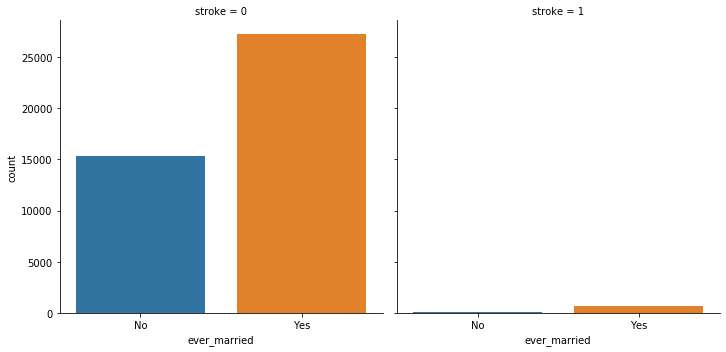

In [ ]:
sns.catplot(x='ever_married',kind='count',col='stroke',data=training_data)

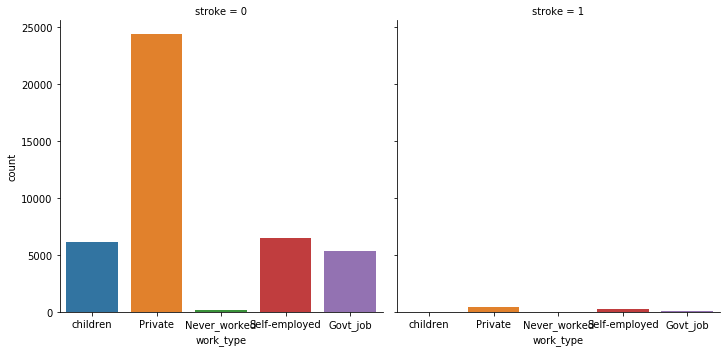

In [ ]:
sns.catplot(x='work_type',kind='count',col='stroke',data=training_data)

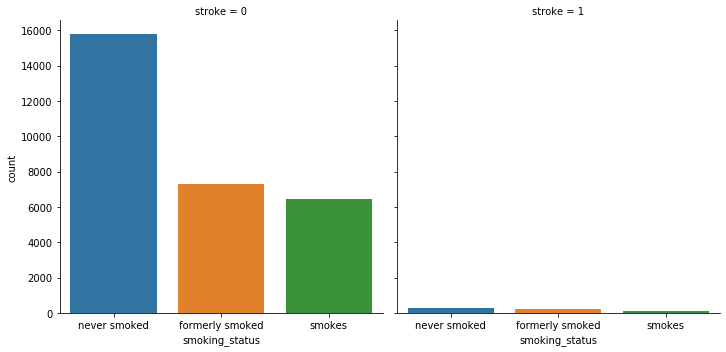

In [ ]:
sns.catplot(x='smoking_status',kind='count',col='stroke',data=training_data)

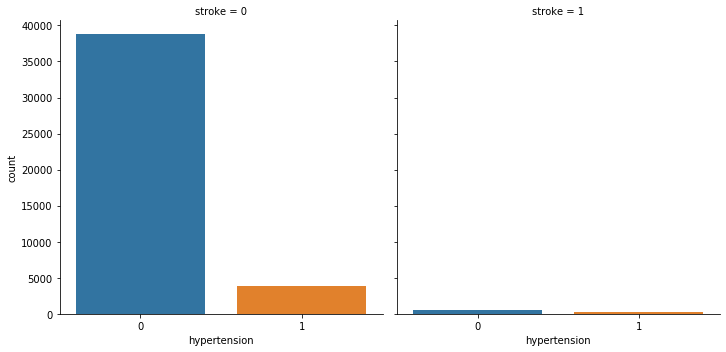

In [ ]:
sns.catplot(x='hypertension',kind='count',col='stroke',data=training_data)

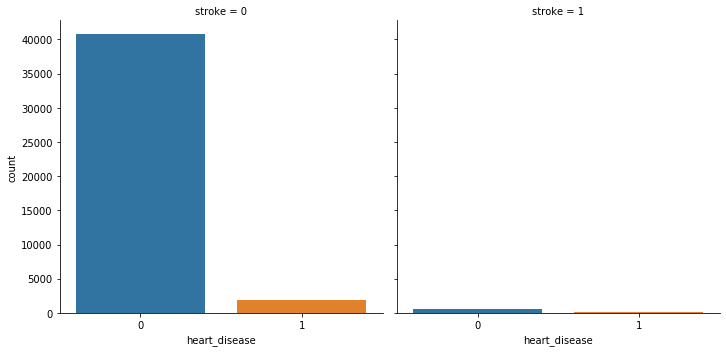

In [ ]:
sns.catplot(x='heart_disease',kind='count',col='stroke',data=training_data)

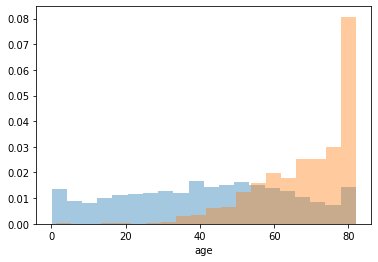

In [ ]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['age'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['age'],kde=False, norm_hist=True, bins=20)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


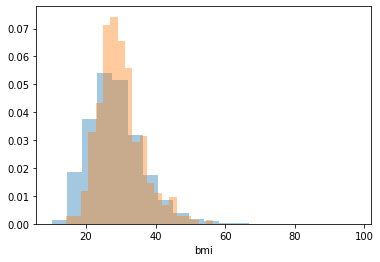

In [ ]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['bmi'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['bmi'],kde=False, norm_hist=True, bins=20)

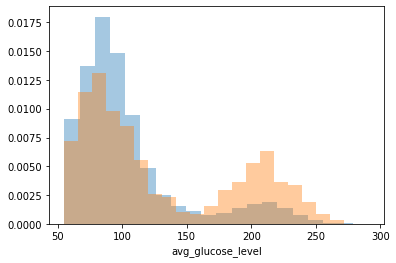

In [ ]:
sns.distplot(training_data.loc[training_data['stroke'] == 0]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)
sns.distplot(training_data.loc[training_data['stroke'] == 1]['avg_glucose_level'],kde=False, norm_hist=True, bins=20)

In [ ]:
#check for missing trainign_data
missing_training_data = training_data.isnull()
for column in missing_training_data.columns.values.tolist():
    if True in missing_training_data[column].value_counts().index.tolist():
        print(column)
        print (missing_training_data[column].value_counts())
        print("") 

bmi
False    41938
True      1462
Name: bmi, dtype: int64

smoking_status
False    30108
True     13292
Name: smoking_status, dtype: int64



In [ ]:
#check for missing test_data
missing_test_data = test_data.isnull()
for column in missing_test_data.columns.values.tolist():
    if True in missing_test_data[column].value_counts().index.tolist():
        print(column)
        print (missing_test_data[column].value_counts())
        print("") 

bmi
False    18010
True       591
Name: bmi, dtype: int64

smoking_status
False    12850
True      5751
Name: smoking_status, dtype: int64



Clearly bmi and smoking_status contain a lot of missing values in both training and test data For BMI we can replace the missing data with the average

In [ ]:
training_data['bmi'].replace(np.nan, training_data['bmi'].astype('float').mean(axis=0), inplace=True)
test_data['bmi'].replace(np.nan, test_data['bmi'].astype('float').mean(axis=0), inplace=True)

~30% of smoking data is missing, hence it seems reasonable to consider dropping this data or replacing it

we are going to build decision tree so we need to turn "ever_married, work_type, residence_type,smoking status" to numerical values

In [ ]:
lbl=preprocessing.LabelEncoder()
training_data['gender'] = lbl.fit_transform(training_data['gender'])
training_data['ever_married'] = lbl.fit_transform(training_data['ever_married'])
training_data['work_type'] = lbl.fit_transform(training_data['work_type'])
training_data['Residence_type'] = lbl.fit_transform(training_data['Residence_type'])
test_data['gender'] = lbl.fit_transform(test_data['gender'])
test_data['ever_married'] = lbl.fit_transform(test_data['ever_married'])
test_data['work_type'] = lbl.fit_transform(test_data['work_type'])
test_data['Residence_type'] = lbl.fit_transform(test_data['Residence_type'])

In [ ]:
#We can consider dropping smoking data all together
training_data_nosmoke=training_data.drop(columns='smoking_status',axis=1,inplace=False)
test_data_nosmoke=test_data.drop(columns='smoking_status',axis=1,inplace=False)

# Or replace by mode
training_data['smoking_status'].fillna(training_data['smoking_status'].mode()[0], inplace=True)
training_data['smoking_status'] = lbl.fit_transform(training_data['smoking_status'])
test_data['smoking_status'].fillna(test_data['smoking_status'].mode()[0], inplace=True)
test_data['smoking_status'] = lbl.fit_transform(test_data['smoking_status'])

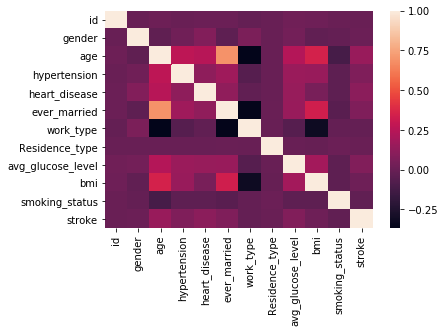

In [ ]:
# Correlation heatmap
corr = training_data.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

Now that we have cleaned up our data we will build our decision tree

With mode smoking data

In [ ]:
features = list(training_data.columns[1:11])
X = training_data[features]
y = training_data['stroke']

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(training_data.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_res, y_res = sm.fit_sample(X_trainset, y_trainset)
#con=pd.concat([X_trainset,y_trainset], axis=1)
#stroke = con[con.stroke==1]
#no_stroke = con[con.stroke==0]
#stroke_upsampled = resample(stroke,
#                          replace=True, # sample with replacement
#                          n_samples=len(no_stroke), # match number in majority class
#                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
print('Resampled dataset shape %s' % Counter(y_res))


#X_trainset_up = upsampled[features]
#y_trainset_up = upsampled['stroke']


#tree_up = DecisionTreeClassifier()
#tree_up.fit(X_trainset_up,y_trainset_up)
#pred_up = tree.predict(X_testset)
tree_up = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=98, splitter='best')
tree_up.fit(X_res,y_res)
pred_up = tree_up.predict(X_testset)
#prediction on the known test set
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_up))
print("Precision: ", metrics.precision_score(y_testset,pred_up))
print("Recall: ", metrics.recall_score(y_testset,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_up))



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    42617
1      783
Name: stroke, dtype: int64
Resampled dataset shape Counter({0: 34079, 1: 34079})


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      8538
           1       0.09      0.24      0.13       142

    accuracy                           0.95      8680
   macro avg       0.54      0.60      0.55      8680
weighted avg       0.97      0.95      0.96      8680


Confusion matrix: 
[[8203  335]
 [ 108   34]]
Precision:  0.0921409214092141
Recall:  0.23943661971830985
Accuracy:  0.948963133640553


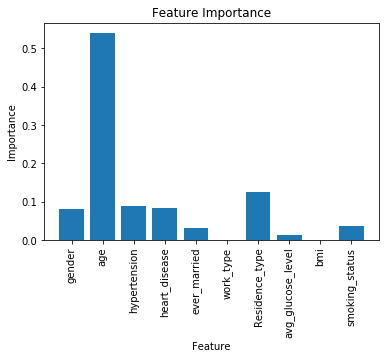

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [ ]:
# plot feature importance
plt.bar(range(len(tree_up.feature_importances_)), tree_up.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree_up.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

In [ ]:
#undersample
from sklearn.utils import resample
# downsample majority
Z = pd.concat([X_trainset, y_trainset], axis=1)
not_stroke = Z[Z.stroke==0]
stroke = Z[Z.stroke==1]
not_stroke_downsampled = resample(not_stroke,
                                replace = False, # sample without replacement
                                n_samples = len(stroke), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_stroke_downsampled, stroke])

# checking counts
downsampled.stroke.value_counts()
y_down= downsampled.stroke
X_down = downsampled.drop('stroke', axis=1)

tree_down = DecisionTreeClassifier()
tree_down.fit(X_down,y_down)
pred_down = tree_down.predict(X_testset)
#prediction on the known test set
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_down))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_down))

print("Precision: ", metrics.precision_score(y_testset,pred_down))
print("Recall: ", metrics.recall_score(y_testset,pred_down))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_down))



Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      8538
           1       0.04      0.74      0.07       142

    accuracy                           0.70      8680
   macro avg       0.52      0.72      0.45      8680
weighted avg       0.98      0.70      0.81      8680


Confusion matrix: 
[[5982 2556]
 [  37  105]]
Precision:  0.03945885005636979
Recall:  0.7394366197183099
Accuracy:  0.7012672811059908


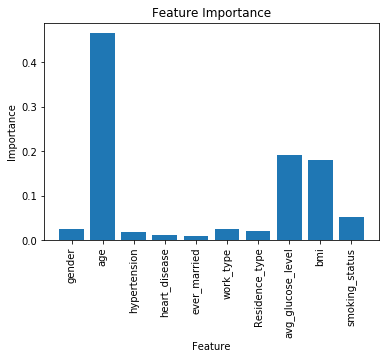

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [ ]:
# plot feature importance
plt.bar(range(len(tree_down.feature_importances_)), tree_down.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree_down.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)

With smoking removed

In [ ]:
features = list(training_data_nosmoke.columns[1:10])
print(features)
X = training_data_nosmoke[features]
y = training_data_nosmoke['stroke']

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
ros=RandomOverSampler(random_state=42)
sm = SMOTE(random_state=27, ratio=1.0)

print(training_data_nosmoke.stroke.value_counts())


#X_res,y_res =ros.fit_resample(X_trainset,y_trainset)
X_res, y_res = sm.fit_sample(X_trainset, y_trainset)
#con=pd.concat([X_trainset,y_trainset], axis=1)
#stroke = con[con.stroke==1]
#no_stroke = con[con.stroke==0]
#stroke_upsampled = resample(stroke,
#                          replace=True, # sample with replacement
#                          n_samples=len(no_stroke), # match number in majority class
#                          random_state=27) # reproducible results

# combine majority and upsampled minority
#upsampled = pd.concat([no_stroke, stroke_upsampled])

# check new class counts
print('Resampled dataset shape %s' % Counter(y_res))


#X_trainset_up = upsampled[features]
#y_trainset_up = upsampled['stroke']


#tree_up = DecisionTreeClassifier()
#tree_up.fit(X_trainset_up,y_trainset_up)
#pred_up = tree.predict(X_testset)
tree_up = DecisionTreeClassifier()
tree_up.fit(X_res,y_res)
pred_up = tree_up.predict(X_testset)
#prediction on the known test set
print("Classification report: ")
print(metrics.classification_report(y_testset,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_testset,pred_up))

print("Precision: ", metrics.precision_score(y_testset,pred_up))
print("Recall: ", metrics.recall_score(y_testset,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_testset,pred_up))


0    42617
1      783
Name: stroke, dtype: int64
Resampled dataset shape Counter({0: 34098, 1: 34098})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8519
           1       0.07      0.09      0.08       161

    accuracy                           0.96      8680
   macro avg       0.53      0.54      0.53      8680
weighted avg       0.97      0.96      0.96      8680


Confusion matrix: 
[[8323  196]
 [ 146   15]]
Precision:  0.07109004739336493
Recall:  0.09316770186335403
Accuracy:  0.9605990783410139


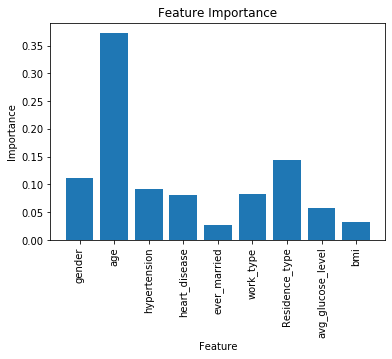

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi']


In [ ]:
# plot feature importance
plt.bar(range(len(tree_up.feature_importances_)), tree_up.feature_importances_)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(range(len(tree_up.feature_importances_)), features,rotation='vertical')
plt.show()
print(features)



Balancing the imbalance dataset

In [ ]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE()

X_resampled, y_resampled = ros.fit_resample(training_data.loc[:,training_data.columns!='stroke'], 
                                            training_data['stroke'])

training_data.loc[:,training_data.columns!='stroke'].columns

X_resampled_1, y_resampled_1 = ros.fit_resample(training_data_nosmoke.loc[:,training_data_nosmoke.columns!='stroke'], 
                                            training_data_nosmoke['stroke'])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(68187, 11)
(17047, 11)


In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_resampled_1,y_resampled_1,test_size=0.2)
print(X_train_1.shape)
print(X_test_1.shape)

(68187, 10)
(17047, 10)


Logistic regression with smoke included

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,auc,roc_auc_score,precision_score,recall_score
log = LogisticRegression(penalty='l2', C=0.1)
log.fit(X_train,y_train)

pred = log.predict(X_test)
print(classification_report(y_test,pred))
print (accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))

precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)


impFeatures = pd.DataFrame(log.coef_[0] ,index=training_data.loc[:,training_data.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      8431
           1       0.73      0.79      0.76      8616

    accuracy                           0.74     17047
   macro avg       0.75      0.74      0.74     17047
weighted avg       0.75      0.74      0.74     17047

0.744060538511175
[[5870 2561]
 [1802 6814]]
precision =  0.7268266666666666 
 recall =  0.7908542246982359
                   Importance
age                  0.056824
avg_glucose_level    0.002510
heart_disease        0.002004
hypertension         0.001380
id                  -0.000009
ever_married        -0.000538
gender              -0.000849
Residence_type      -0.001841
smoking_status      -0.004537
work_type           -0.008723
bmi                 -0.101293


Logistics regression without smoke

In [ ]:
logg = LogisticRegression(penalty='l2', C=0.1)
logg.fit(X_train_1,y_train_1)

pred = logg.predict(X_test_1)
print(classification_report(y_test_1,pred))
print (accuracy_score(y_test_1,pred))
print (confusion_matrix(y_test_1,pred))

precision = precision_score(y_test_1,pred)
recall = recall_score(y_test_1,pred)
print( 'precision = ', precision, '\n', 'recall = ', recall)

impFeatures = pd.DataFrame(logg.coef_[0] ,index=training_data_nosmoke.loc[:,training_data_nosmoke.columns!='stroke'].columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
print (impFeatures)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      8513
           1       0.74      0.80      0.77      8534

    accuracy                           0.76     17047
   macro avg       0.76      0.76      0.76     17047
weighted avg       0.76      0.76      0.76     17047

0.760955006746055
[[6143 2370]
 [1705 6829]]
precision =  0.7423633003587347 
 recall =  0.8002109210217951
                   Importance
heart_disease        1.030574
hypertension         0.837242
gender               0.133161
age                  0.068576
avg_glucose_level    0.001724
id                  -0.000008
bmi                 -0.059100
work_type           -0.176739
Residence_type      -0.330525
ever_married        -0.411279


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
  def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))


In [ ]:
from sklearn.naive_bayes import GaussianNB
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[23630 10556]
 [ 5128 28873]]
test-set confusion matrix:
 [[5857 2574]
 [1263 7353]]
recall score:  0.8534122562674095
precision score:  0.7407071622846781
accuracy score:  0.7749164075790461
ROC AUC: 0.8402224673346486


In [ ]:
from sklearn.naive_bayes import GaussianNB
y_pred_1, y_pred_prob_1 = get_predictions(GaussianNB(), X_train_1, y_train_1, X_test_1)
print_scores(y_test_1,y_pred_1,y_pred_prob_1)

train-set confusion matrix:
 [[23443 10661]
 [ 4982 29101]]
test-set confusion matrix:
 [[5848 2665]
 [1241 7293]]
recall score:  0.8545816733067729
precision score:  0.7323759791122716
accuracy score:  0.7708687745644395
ROC AUC: 0.8396004638241831


Projecting 10-dimensional data to 2D


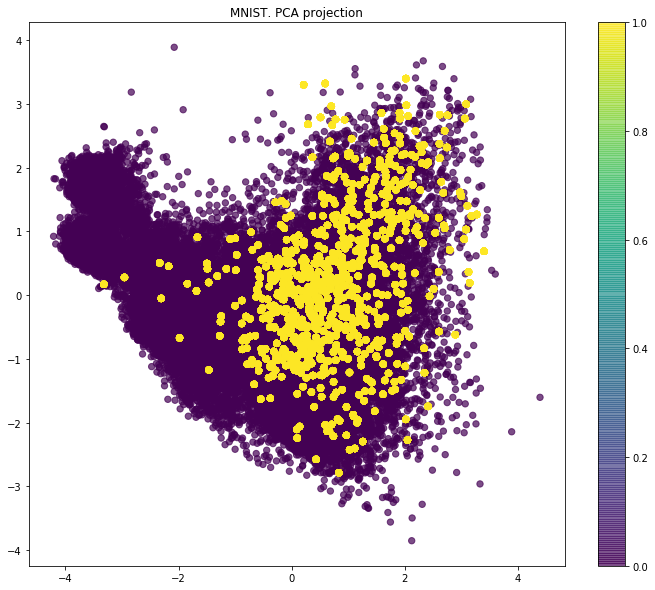

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
X_scaled = StandardScaler().fit_transform(X_resampled_1)

pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)

print('Projecting %d-dimensional data to 2D' % X_scaled.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y_resampled_1, alpha=0.7, s=40);
plt.colorbar()
plt.title('MNIST. PCA projection');

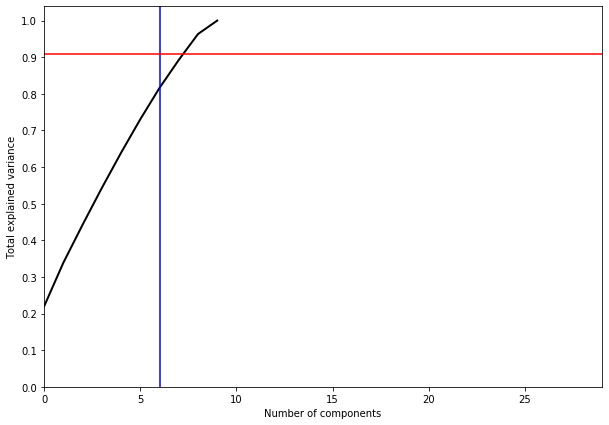

In [ ]:
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 29)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.91, c='r')
plt.show();

7 variable contribute to 90 % of the variance

In [ ]:
X__train, X_holdout, y_train, y_holdout = train_test_split(X_resampled_1,y_resampled_1, test_size=0.3, random_state=17)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-1, 8, 5)

lr_pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state=17,solver='liblinear'))])

lr_params = {'lr__C': Cs}

lr_pipe_grid = GridSearchCV(lr_pipe, lr_params, cv=10, scoring='recall')
lr_pipe_grid.fit(X__train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
             

In [ ]:
lr_pipe_grid.best_params_, lr_pipe_grid.best_score_

({'lr__C': 0.1}, 0.8080170352425651)

In [ ]:
scores=[]
for C in Cs:
    pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=C, random_state=17,solver='liblinear'))])
    scores.append(cross_val_score(pipe,X__train,y_train,cv=10, scoring='recall').mean())

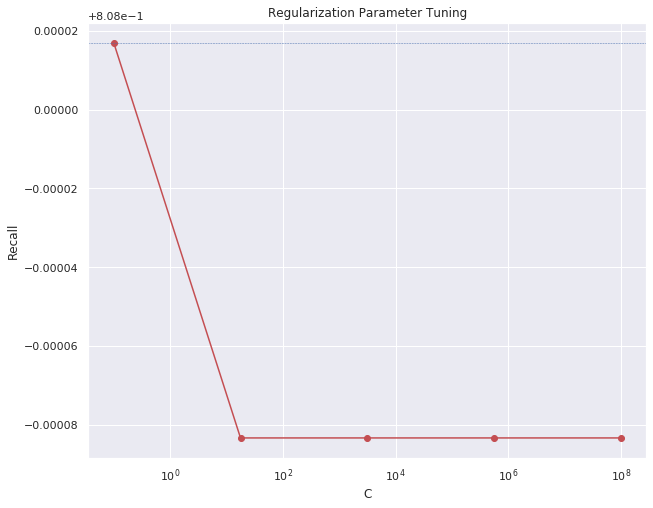

In [ ]:
score_C_1 = lr_pipe_grid.best_score_
sns.set()
plt.figure(figsize=(10,8))
plt.plot(Cs, scores, 'ro-')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('Regularization Parameter Tuning')
# horizontal line -- model quality with default C value
plt.axhline(y=score_C_1, linewidth=.5, color='b', linestyle='dashed') 
plt.show()

In [ ]:
print ("Accuracy Score : ",accuracy_score(y_holdout, lr_pipe_grid.predict(X_holdout)) )
print ("Recall Score  ",recall_score(y_holdout, lr_pipe_grid.predict(X_holdout)))
print ("Precision Score  ",precision_score(y_holdout, lr_pipe_grid.predict(X_holdout)))

Accuracy Score :  0.7755660709397364
Recall Score   0.8094901406237724
Precision Score   0.7566456160963431
